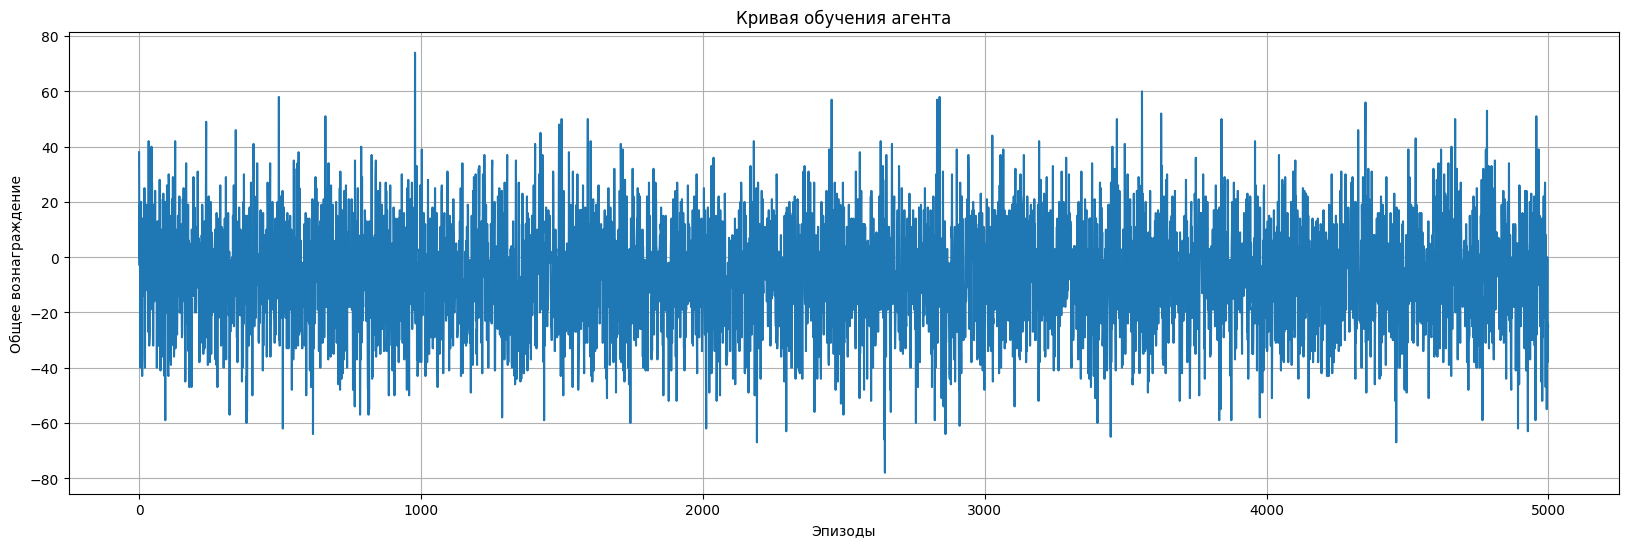

Начальные стаканы: [185 191 115  88 175]
Переливаем 20.10 мл из стакана 1 в стакан 3. Текущие стаканы: [185 170 115 108 175]
Переливаем 17.20 мл из стакана 0 в стакан 1. Текущие стаканы: [167 187 115 108 175]
Переливаем 8.30 мл из стакана 0 в стакан 2. Текущие стаканы: [158 187 123 108 175]
Переливаем 3.90 мл из стакана 0 в стакан 1. Текущие стаканы: [154 190 123 108 175]
Переливаем 2.00 мл из стакана 0 в стакан 2. Текущие стаканы: [152 190 125 108 175]
Переливаем 1.00 мл из стакана 0 в стакан 1. Текущие стаканы: [151 191 125 108 175]
Переливаем 20.50 мл из стакана 1 в стакан 0. Текущие стаканы: [171 170 125 108 175]
Переливаем 10.10 мл из стакана 1 в стакан 2. Текущие стаканы: [171 159 135 108 175]
Переливаем 12.70 мл из стакана 4 в стакан 2. Текущие стаканы: [171 159 147 108 162]
Переливаем 10.80 мл из стакана 0 в стакан 3. Текущие стаканы: [160 159 147 118 162]
Переливаем 4.90 мл из стакана 1 в стакан 4. Текущие стаканы: [160 154 147 118 166]
Переливаем 2.50 мл из стакана 1 в стакан

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
k = 5
num_episodes = 5000
learning_rate = 0.1
discount_factor = 0.9
exploration_rate = 1.0
exploration_decay = 0.995
min_exploration_rate = 0.01

# Инициализация стаканов
def initialize_glasses(k):
    return np.random.randint(50, 200, size=k)

# Проверки, все ли стаканы одинаковые
def all_equal(glasses):
    return np.all(glasses == glasses[0])

# Основной цикл обучения
def train_agent():
    global exploration_rate
    rewards = []

    for episode in range(num_episodes):
        glasses = initialize_glasses(k)
        total_reward = 0

        while not all_equal(glasses):
            # Выбор стаканов для переливания
            from_idx, to_idx = np.random.choice(k, 2, replace=False)

            # Переливание жидкости
            avg = np.mean(glasses)

            if glasses[from_idx] > avg:
                transfer_amount = (glasses[from_idx] - avg) / 2
                glasses[from_idx] -= transfer_amount
                glasses[to_idx] += transfer_amount
                total_reward -= 1  # Штраф за поднятие стакана
            else:
                total_reward += 1  # Положительное вознаграждение за уравнивание

        total_reward += 10  # Вознаграждение за уравнивание стаканов
        rewards.append(total_reward)


        exploration_rate = max(min_exploration_rate, exploration_rate * exploration_decay)

    return rewards

# Обучение агента
rewards = train_agent()

# График обучения
plt.figure(figsize=(20, 6))
plt.plot(rewards)
plt.title('Кривая обучения агента')
plt.xlabel('Эпизоды')
plt.ylabel('Общее вознаграждение')
plt.grid()
plt.show()

# Демонстрация действий по переливанию
def demonstrate_agent_actions():
    glasses = initialize_glasses(k)
    print("Начальные стаканы:", glasses)

    while not all_equal(glasses):
        from_idx, to_idx = np.random.choice(k, 2, replace=False)
        avg = np.mean(glasses)

        if glasses[from_idx] > avg:
            transfer_amount = (glasses[from_idx] - avg) / 2
            glasses[from_idx] -= transfer_amount
            glasses[to_idx] += transfer_amount
            print(f"Переливаем {transfer_amount:.2f} мл из стакана {from_idx} в стакан {to_idx}. Текущие стаканы: {glasses}")

    print("В итоге стаканы уравнены:", glasses)


demonstrate_agent_actions()